In [1]:
import load_read_name_extractor as lrne
import cv2  # importing cv
import mahotas
import numpy as np
from pylab import imshow, show


In [2]:
img_list, names = lrne.load_name_and_img("cropped_96_192/*.jpeg")

iteration = "96x192_gaussian_filter_sigma=15"



In [3]:
def it_harlick(img_list):
    harlick_features = []
    for i in range (len(img_list)):
        img_list[i] = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
        # extract Haralick texture features in 4 directions, then take the
        # mean of each direction
        features = mahotas.features.haralick(img_list[i], ignore_zeros=False).mean(axis=0)
        harlick_features.append(features)
    return harlick_features

In [6]:
def it_harlick1(img_list):
    harlick_features = []
    labelled = []
    for i in range(len(img_list)):
        img = img_list[i]
        img = img[:, :, 0]
        gaussian = mahotas.gaussian_filter(img, 15)
        gaussian = (gaussian > gaussian.mean())
        temp_label, n = mahotas.label(gaussian)
        labelled.append(temp_label)

        harlick_features.append(mahotas.features.haralick(temp_label))
    return harlick_features, labelled
    


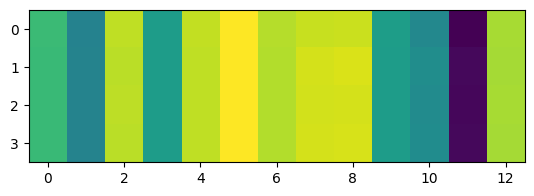

In [7]:
harlick_features, labbels = it_harlick1(img_list)
imshow(labbels[0])
imshow(harlick_features[0])
#harlick_features1 = np.mean(harlick_features1, axis=1)

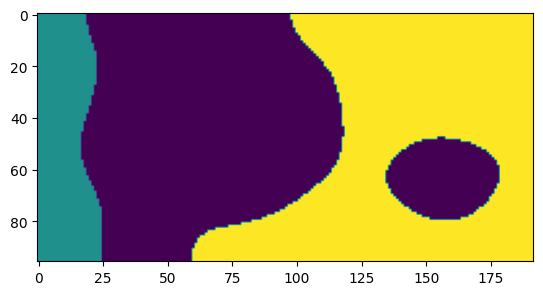

In [13]:
imshow(labbels[530])
#imshow(harlick_features[0])


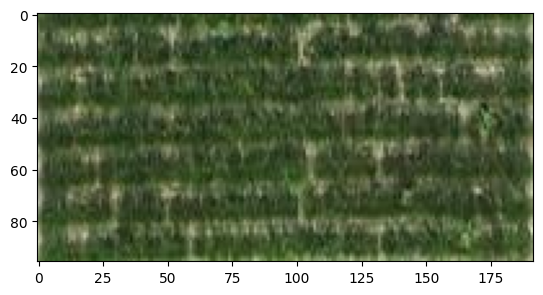

In [14]:
imshow(img_list[530])

In [ ]:
lrne.save_in_txt(names, "Features/img_names_" + iteration)
lrne.save_in_txt(harlick_features1, "Features/harlick_features_" + iteration)